In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

In [2]:
!pip install colorama
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df=pd.read_csv("/content/MoviesOnStreamingPlatforms_updated.csv")

In [4]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [6]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [7]:
df["Age"] = df["Age"].str.replace("+","")

<ipython-input-7-2e421bae528d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Age"] = df["Age"].str.replace("+","")


In [8]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [9]:
data=df.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 0 to 16705
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3044 non-null   int64  
 1   ID               3044 non-null   int64  
 2   Title            3044 non-null   object 
 3   Year             3044 non-null   int64  
 4   Age              3044 non-null   float64
 5   IMDb             3044 non-null   float64
 6   Rotten Tomatoes  3044 non-null   float64
 7   Netflix          3044 non-null   int64  
 8   Hulu             3044 non-null   int64  
 9   Prime Video      3044 non-null   int64  
 10  Disney+          3044 non-null   int64  
 11  Type             3044 non-null   int64  
 12  Directors        3044 non-null   object 
 13  Genres           3044 non-null   object 
 14  Country          3044 non-null   object 
 15  Language         3044 non-null   object 
 16  Runtime          3044 non-null   float64
dtypes: float64(4)

In [11]:
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [12]:
len(data['Directors'].unique())

2384

In [13]:
data

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16657,16658,A Kid in King Arthur's Court,1995,7.0,4.7,5.0,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7.0,3.3,17.0,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7.0,4.7,13.0,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7.0,3.0,6.0,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


In [14]:
len(data['Directors'].unique())

2384

In [15]:
len(data['Genres'].unique())

722

In [16]:
def splitting(dataframe,col):
    result = dataframe[col].str.get_dummies(',')
    print('Done!')
    return result

In [17]:
m_genres = splitting(data,'Genres')
m_lang = splitting(data,'Language')

Done!
Done!


In [18]:
def val_sum(df,c):
    return df[c].sum(axis=0)

In [19]:
val_counts = []
dfs = [data]
cols = ['Netflix','Hulu','Prime Video','Disney+']

for x in dfs:
    for y in cols:
        val_counts.append(val_sum(x,y))

In [20]:
val_counts

[974, 420, 1736, 173]

In [21]:
def donut(i,df,sizes,title):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, 
                autopct='%1.1f%%', shadow=True)

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.axis('equal')

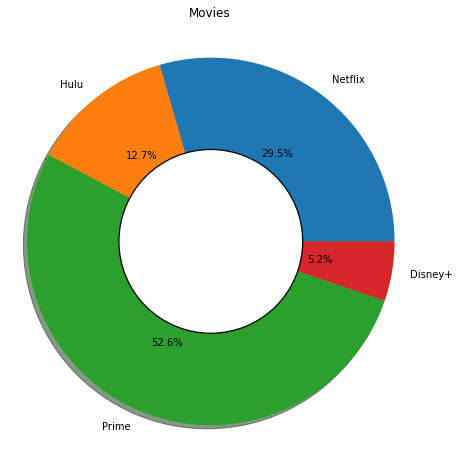

In [22]:
fig = plt.subplots(figsize=(16, 8))
labels = 'Netflix', 'Hulu','Prime','Disney+'
sizes1 = [val_counts[0], val_counts[1],val_counts[2],val_counts[3]]
explode = (0, 0, 0, 0) 

donut(121,data,sizes1,'Movies')
plt.show()

In [23]:
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Directors','Year','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()

In [24]:
sunburst(data,'Netflix','amp')

In [25]:
sunburst(data,'Hulu','Blugrn')

In [26]:
sunburst(data,'Prime Video','haline')

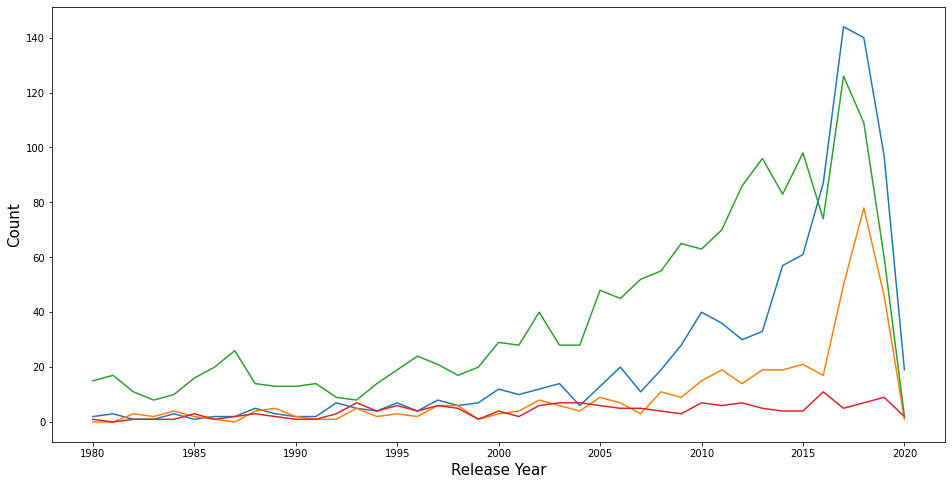

In [29]:
post_1980 = data[data.Year >= 1980]
year_movies = post_1980.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

plt.figure(figsize = (16, 8))
sns.lineplot(x=year_movies.index,y=year_movies['Netflix'])
sns.lineplot(x=year_movies.index,y=year_movies['Hulu'])
sns.lineplot(x=year_movies.index,y=year_movies['Prime Video'])
sns.lineplot(x=year_movies.index,y=year_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [30]:
r = data.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime Video',]]
r['IMDb'] = r['IMDb'].astype(float)

In [31]:
r.style.bar(subset=["Netflix"], color='#F7120B')\
.bar(subset=["Hulu"], color='#27F70B')\
.bar(subset=["Prime Video"], color='#0551FE')\
.bar(subset=["IMDb"], color='#').background_gradient(cmap='Purples')

,Title,IMDb,Netflix,Hulu,Prime Video,Disney+
3560,The Dark Knight,9.000000,0,1,0,0
0,Inception,8.800000,1,0,0,0
4,"The Good, the Bad and the Ugly",8.800000,1,0,1,0
16213,Star Wars: The Empire Strikes Back,8.700000,0,0,0,1
1,The Matrix,8.700000,1,0,0,0
3561,GoodFellas,8.700000,0,1,0,0
3564,The Green Mile,8.600000,0,1,0,0
3562,Parasite,8.600000,0,1,1,0
16212,Star Wars: A New Hope,8.600000,0,0,0,1
4439,It's a Wonderful Life,8.600000,0,0,1,0


In [39]:
r1 = data.sort_values(by='IMDb', ascending=False)
r1 = r1[0:10]
r1['Movies']='Movies'
fig = px.treemap(r1, path=['Movies','Title', 'Genres','Language'], values='IMDb',color='IMDb',color_continuous_scale='earth')
fig.show()